# You need to classify the normal salary range of different employees based on information provided by different features in the dataset. The Class variable provides the range of salary into 3 categories that are low, mid and high range.
You have been given a train data and the test data

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:
#losding the data set

test=pd.read_csv("test-2.csv")
train=pd.read_csv('train-2.csv')

In [138]:
# chceking the values in the data set

test.head()

,ID,Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,Job Code,Job,Employee Identifier,Overtime,Other Salaries,Retirement,Health/Dental,Other Benefits,Total Benefits
0,9240,Fiscal,2015,4,Community Health,DPH,DPH Public Health,790,"SEIU - Miscellaneous, Local 1021",2400,"Lab, Pharmacy & Med Techs",2454,Clinical Pharmacist,23148,0.0,0.00,0.00,2203.32,2014.12,4217.44
1,209951,Fiscal,2016,4,Community Health,DPH,DPH Public Health,791,"SEIU - Staff and Per Diem Nurses, Local 1021",2300,Nursing,2328,Nurse Practitioner,8789,0.0,1689.53,31464.76,11872.83,9947.92,53285.51
2,29879,Fiscal,2016,5,Culture & Recreation,LIB,LIB Public Library,790,"SEIU - Miscellaneous, Local 1021",3600,Library,3610,Library Assistant,48290,0.0,932.77,8858.22,9705.96,3764.93,22329.11
3,177914,Fiscal,2015,1,Public Protection,POL,POL Police,21,"Prof & Tech Engineers - Miscellaneous, Local 21",1800,"Budget, Admn & Stats Analysis",1824,Pr Administrative Analyst,43253,0.0,0.00,23955.61,11687.19,8880.83,44523.63
4,180406,Fiscal,2015,4,Community Health,DPH,DPH Public Health,790,"SEIU - Miscellaneous, Local 1021",2900,Human Services,2930,Psychiatric Social Worker,13722,0.0,620.54,20644.61,12384.59,7491.65,40520.85


In [139]:
train.head()

,ID,Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,...,Job Code,Job,Employee Identifier,Overtime,Other Salaries,Retirement,Health/Dental,Other Benefits,Total Benefits,Class
0,9248,Fiscal,2017,3,Human Welfare & Neighborhood Development,DSS,HSA Human Services Agency,535,"SEIU - Human Services, Local 1021",2900,...,2905,Senior Eligibility Worker,41351,0.00,240.00,11896.36,13765.55,5248.43,30910.34,2
1,44541,Fiscal,2014,6,General Administration & Finance,ASR,ASR Assessor / Recorder,21,"Prof & Tech Engineers - Miscellaneous, Local 21",4200,...,4222,Sr Personal Property Auditor,41792,0.00,400.00,15429.94,9337.37,5599.01,30366.32,2
2,47031,Fiscal,2014,3,Human Welfare & Neighborhood Development,DSS,HSA Human Services Agency,535,"SEIU - Human Services, Local 1021",2900,...,2910,Social Worker,9357,0.00,1080.00,9682.00,8848.03,3463.92,21993.95,2
3,139416,Fiscal,2014,1,Public Protection,FIR,FIR Fire Department,798,"Firefighters - Miscellaneous, Local 798",H000,...,H002,Firefighter,28022,25730.46,18414.18,24222.26,13911.13,2416.58,40549.97,3
4,123780,Fiscal,2013,2,"Public Works, Transportation & Commerce",MTA,MTA Municipal Transprtn Agncy,790,"SEIU - Miscellaneous, Local 1021",1600,...,1224,Pr Payroll & Personnel Clerk,51052,1138.28,2148.11,15437.62,12828.15,7246.54,35512.31,3


In [3]:
#concating the datasets

all_=pd.concat([test,train],axis=0,sort=False)

In [4]:
all_.head(50)

,ID,Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,...,Job Code,Job,Employee Identifier,Overtime,Other Salaries,Retirement,Health/Dental,Other Benefits,Total Benefits,Class
0,9240,Fiscal,2015,4,Community Health,DPH,DPH Public Health,790,"SEIU - Miscellaneous, Local 1021",2400,...,2454,Clinical Pharmacist,23148,0.00,0.00,0.00,2203.32,2014.12,4217.44,NaN
1,209951,Fiscal,2016,4,Community Health,DPH,DPH Public Health,791,"SEIU - Staff and Per Diem Nurses, Local 1021",2300,...,2328,Nurse Practitioner,8789,0.00,1689.53,31464.76,11872.83,9947.92,53285.51,NaN
2,29879,Fiscal,2016,5,Culture & Recreation,LIB,LIB Public Library,790,"SEIU - Miscellaneous, Local 1021",3600,...,3610,Library Assistant,48290,0.00,932.77,8858.22,9705.96,3764.93,22329.11,NaN
3,177914,Fiscal,2015,1,Public Protection,POL,POL Police,21,"Prof & Tech Engineers - Miscellaneous, Local 21",1800,...,1824,Pr Administrative Analyst,43253,0.00,0.00,23955.61,11687.19,8880.83,44523.63,NaN
4,180406,Fiscal,2015,4,Community Health,DPH,DPH Public Health,790,"SEIU - Miscellaneous, Local 1021",2900,...,2930,Psychiatric Social Worker,13722,0.00,620.54,20644.61,12384.59,7491.65,40520.85,NaN
5,173831,Fiscal,2014,5,Culture & Recreation,REC,REC Recreation & Park Commsn,790,"SEIU - Miscellaneous, Local 1021",3200,...,3279,Recreation Leader,41958,0.00,0.00,0.00,992.11,288.30,1280.41,NaN
6,83302,Fiscal,2017,3,Human Welfare & Neighborhood Development,DSS,HSA Human Services Agency,535,"SEIU - Human Services, Local 1021",2900,...,2916,Social Work Specialist,23488,0.00,1155.00,16503.44,13765.54,7062.29,37331.27,NaN
7,83596,Fiscal,2015,2,"Public Works, Transportation & Commerce",CWP,WWE Wastewater Enterprise,39,"Stationary Engineers, Local 39",7300,...,7372,"Stationary Eng, Sewage Plant",19312,1214.83,2445.54,21032.96,12501.45,7554.29,41088.70,NaN
8,172928,Fiscal,2013,2,"Public Works, Transportation & Commerce",WTR,WTR Water Enterprise,38,"Plumbers and Pipefitters, Local 38",7300,...,7388,Utility Plumber,4923,21105.48,10682.71,17228.39,12828.13,8604.46,38660.98,NaN
9,98385,Fiscal,2016,4,Community Health,DPH,DPH Public Health,790,"SEIU - Miscellaneous, Local 1021",9900,...,9910,Public Service Trainee,9957,0.00,0.00,0.00,1659.57,481.29,2140.86,NaN


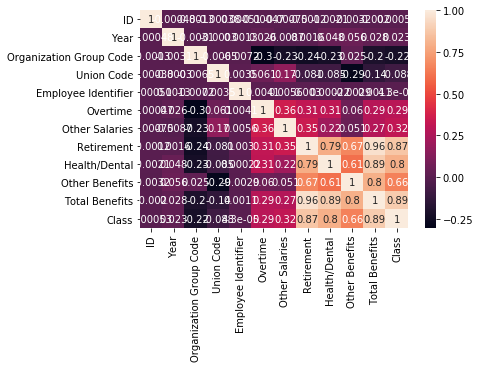

In [7]:
sns.heatmap(all_.corr(), annot=True)

//anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
//anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


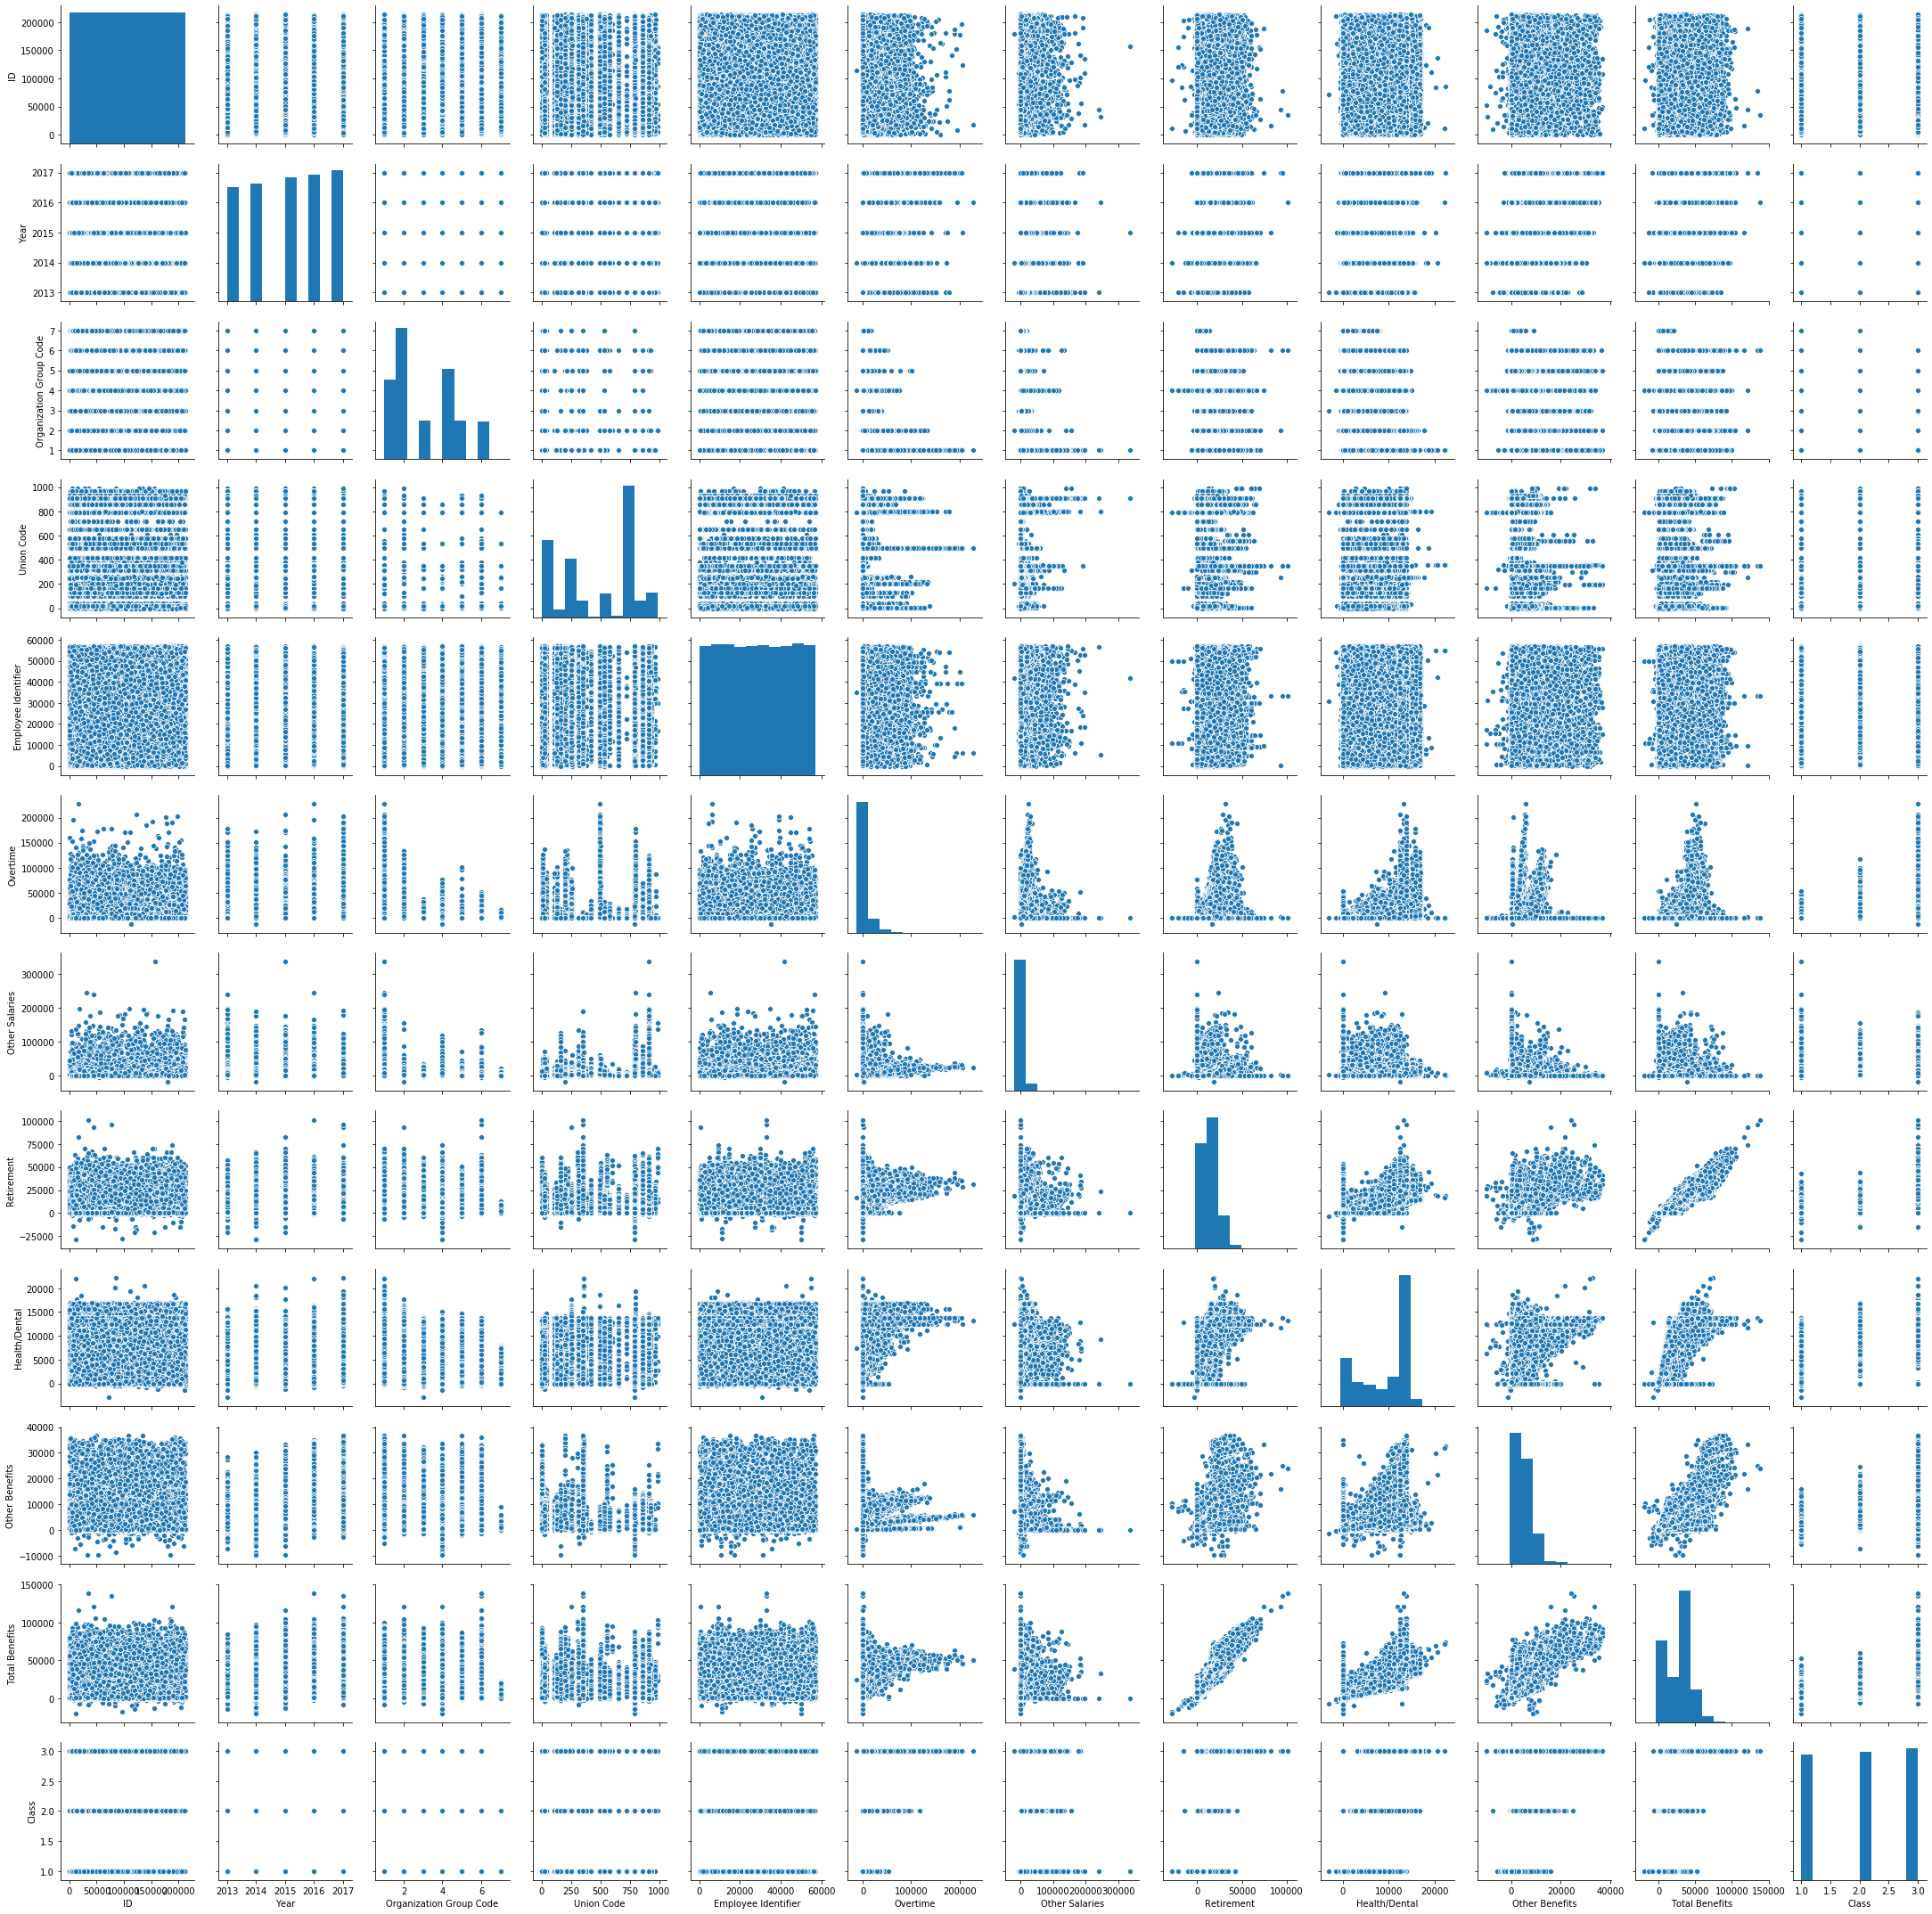

In [8]:
sns.pairplot(all_)

In [142]:
#dropping all the repetative columns

all_.drop(['Department','Employee Identifier','Job','Job Family','Job Family Code','Union','Year Type'],axis=1,inplace=True)

In [143]:
all_.isnull().sum()

ID                             0
Year                           0
Organization Group Code        0
Organization Group             0
Department Code                0
Union Code                     0
Job Code                       0
Overtime                       0
Other Salaries                 0
Retirement                     0
Health/Dental                  0
Other Benefits                 0
Total Benefits                 0
Class                      63895
dtype: int64

In [144]:
all_.head()

,ID,Year,Organization Group Code,Organization Group,Department Code,Union Code,Job Code,Overtime,Other Salaries,Retirement,Health/Dental,Other Benefits,Total Benefits,Class
0,9240,2015,4,Community Health,DPH,790,2454,0.0,0.00,0.00,2203.32,2014.12,4217.44,NaN
1,209951,2016,4,Community Health,DPH,791,2328,0.0,1689.53,31464.76,11872.83,9947.92,53285.51,NaN
2,29879,2016,5,Culture & Recreation,LIB,790,3610,0.0,932.77,8858.22,9705.96,3764.93,22329.11,NaN
3,177914,2015,1,Public Protection,POL,21,1824,0.0,0.00,23955.61,11687.19,8880.83,44523.63,NaN
4,180406,2015,4,Community Health,DPH,790,2930,0.0,620.54,20644.61,12384.59,7491.65,40520.85,NaN


In [145]:
#dropping categorical columns which does not have any correlation with othere factors

all_.drop(['Organization Group'],axis=1,inplace=True)

In [146]:
all.head()

,Class,Department,Department Code,Employee Identifier,Health/Dental,ID,Job,Job Code,Job Family,Job Family Code,...,Organization Group Code,Other Benefits,Other Salaries,Overtime,Retirement,Total Benefits,Union,Union Code,Year,Year Type
0,NaN,DPH Public Health,DPH,23148,2203.32,9240,Clinical Pharmacist,2454,"Lab, Pharmacy & Med Techs",2400,...,4,2014.12,0.00,0.0,0.00,4217.44,"SEIU - Miscellaneous, Local 1021",790,2015,Fiscal
1,NaN,DPH Public Health,DPH,8789,11872.83,209951,Nurse Practitioner,2328,Nursing,2300,...,4,9947.92,1689.53,0.0,31464.76,53285.51,"SEIU - Staff and Per Diem Nurses, Local 1021",791,2016,Fiscal
2,NaN,LIB Public Library,LIB,48290,9705.96,29879,Library Assistant,3610,Library,3600,...,5,3764.93,932.77,0.0,8858.22,22329.11,"SEIU - Miscellaneous, Local 1021",790,2016,Fiscal
3,NaN,POL Police,POL,43253,11687.19,177914,Pr Administrative Analyst,1824,"Budget, Admn & Stats Analysis",1800,...,1,8880.83,0.00,0.0,23955.61,44523.63,"Prof & Tech Engineers - Miscellaneous, Local 21",21,2015,Fiscal
4,NaN,DPH Public Health,DPH,13722,12384.59,180406,Psychiatric Social Worker,2930,Human Services,2900,...,4,7491.65,620.54,0.0,20644.61,40520.85,"SEIU - Miscellaneous, Local 1021",790,2015,Fiscal


In [147]:
all_.tail()

,ID,Year,Organization Group Code,Department Code,Union Code,Job Code,Overtime,Other Salaries,Retirement,Health/Dental,Other Benefits,Total Benefits,Class
149082,26258,2017,2,DPW,21,5304,0.00,287.85,6785.08,8038.45,3022.34,17845.87,1.0
149083,13799,2014,2,MTA,253,9163,3238.18,3284.85,19683.92,13258.74,5617.78,38560.44,2.0
149084,204395,2015,4,DPH,164,2232,0.00,15231.00,25619.51,6226.78,9372.75,41219.04,3.0
149085,10829,2016,6,REG,790,1402,696.47,0.00,0.00,355.17,142.58,497.75,1.0
149086,83635,2017,4,DPH,790,2468,2651.81,7840.33,21262.87,13528.21,9849.20,44640.28,3.0


# REPLACING THE CATEGORICAL VARIABLES WITH NUMERICAL FOR FURTHER MODEL BUILDING

In [148]:
from sklearn.preprocessing import LabelEncoder

In [149]:
all_['Department Code1'] = LabelEncoder().fit_transform(all_['Department Code'])
all_['DJob Code1'] = LabelEncoder().fit_transform(all_['Job Code'])

In [150]:
all_.head()

,ID,Year,Organization Group Code,Department Code,Union Code,Job Code,Overtime,Other Salaries,Retirement,Health/Dental,Other Benefits,Total Benefits,Class,Department Code1,DJob Code1
0,9240,2015,4,DPH,790,2454,0.0,0.00,0.00,2203.32,2014.12,4217.44,NaN,20,281
1,209951,2016,4,DPH,791,2328,0.0,1689.53,31464.76,11872.83,9947.92,53285.51,NaN,20,264
2,29879,2016,5,LIB,790,3610,0.0,932.77,8858.22,9705.96,3764.93,22329.11,NaN,35,483
3,177914,2015,1,POL,21,1824,0.0,0.00,23955.61,11687.19,8880.83,44523.63,NaN,41,201
4,180406,2015,4,DPH,790,2930,0.0,620.54,20644.61,12384.59,7491.65,40520.85,NaN,20,395


In [151]:
all_.drop('Department Code',axis=1,inplace=True)
all_.drop('Job Code',axis=1,inplace=True)

In [152]:
all_.drop(['Overtime','Total Benefits','Other Salaries'],axis=1,inplace=True)

In [153]:
all_.head()

,ID,Year,Organization Group Code,Union Code,Retirement,Health/Dental,Other Benefits,Class,Department Code1,DJob Code1
0,9240,2015,4,790,0.00,2203.32,2014.12,NaN,20,281
1,209951,2016,4,791,31464.76,11872.83,9947.92,NaN,20,264
2,29879,2016,5,790,8858.22,9705.96,3764.93,NaN,35,483
3,177914,2015,1,21,23955.61,11687.19,8880.83,NaN,41,201
4,180406,2015,4,790,20644.61,12384.59,7491.65,NaN,20,395


In [154]:
all_['Class'].unique()

array([nan,  2.,  3.,  1.])

In [181]:
test = all_[(all_['Class']!=1) & (all_['Class']!=2) & (all_['Class']!=3)]
test.head()
test.drop('Class',inplace=True,axis=1)

/Users/MAC/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [156]:
train = all_[(all_['Class']==1) | (all_['Class']==2) | (all_['Class']==3)]
train.head()

,ID,Year,Organization Group Code,Union Code,Retirement,Health/Dental,Other Benefits,Class,Department Code1,DJob Code1
0,9248,2017,3,535,11896.36,13765.55,5248.43,2.0,22,378
1,44541,2014,6,21,15429.94,9337.37,5599.01,2.0,5,515
2,47031,2014,3,535,9682.00,8848.03,3463.92,2.0,22,382
3,139416,2014,1,798,24222.26,13911.13,2416.58,3.0,28,1106
4,123780,2013,2,790,15437.62,12828.15,7246.54,3.0,37,60


In [157]:
test['Class'].unique()

array([nan])

In [158]:
train['Class'].unique()

array([2., 3., 1.])

# Logictic Regression

In [159]:
from sklearn.linear_model import LogisticRegression

In [299]:
clf = LogisticRegression()
x=train.drop('Class',axis=1)
y=train['Class']

In [301]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [302]:
clf.fit(x_train,y_train)

/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [303]:
y_pred=clf.predict(x_test)

In [304]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

In [305]:
accuracy_score(y_pred,y_test)

0.8701231918080802

# Random Forest

In [344]:
from sklearn.ensemble import RandomForestClassifier
RF_model=RandomForestClassifier(n_estimators=40,random_state=10)

In [345]:
RF_model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=None,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

In [349]:
r=RF_model.predict(test)
r

array([1., 3., 2., ..., 2., 2., 3.])

In [347]:
accuracy_score(r,y_test)

0.9848637288438751

# Grid Search CV

In [331]:
from sklearn.model_selection import GridSearchCV



In [332]:
param_grid={"criterion":["gini","entropy"],
          "min_samples_split":[2,10,10],
          "max_depth":[None,2,5,20],
          "min_samples_leaf":[1,5,20],
          "max_leaf_nodes":[None,5,10,20]}

In [333]:
glf=GridSearchCV(RandomForestClassifier(),param_grid,cv=5)
glf.fit(x_train,y_train)

/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/skl

/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/skl

/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/skl

/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/skl

/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/skl

/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/skl

/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/skl

/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/skl

/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/skl

/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/skl

/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/skl

/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/skl

/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/skl

/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/skl

/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/skl

/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/skl

/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/skl

/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/skl

/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/skl

/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/skl

/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MAC/anaconda3/lib/python3.7/site-packages/skl

KeyboardInterrupt: 

In [313]:
importances=glf.best_estimator_.feature_importances_
importances=pd.DataFrame([all_.columns,importances]).transpose()
importances.columns=[['Variables','Importance']]
importances

,Variables,Importance
0,ID,0.00822658
1,Year,0.018008
2,Organization Group Code,0.00710138
3,Union Code,0.0374541
4,Retirement,0.540866
5,Health/Dental,0.167683
6,Other Benefits,0.155479
7,Class,0.012014
8,Department Code1,0.0531681
9,DJob Code1,None


In [326]:
y1=glf.predict(test)

In [315]:
accuracy_score(y1,y_test)

0.9841706351867999

In [350]:
df=pd.DataFrame({'id':test.ID,'Class':r})

In [351]:
df.to_csv('sub2.csv',index=False)

# KNeighborsClassifier

In [334]:
from sklearn.neighbors import KNeighborsClassifier

model=KNeighborsClassifier(n_neighbors=3,metric='euclidean')
model.fit(x_train,y_train)
y2=model.predict(x_test)
accuracy_score(y2,y_test)

0.9349162698146534

# BaggingClassifier

In [335]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
model1=BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model1.fit(x_train,y_train)
print(model.score(x_test,y_test))
y_pred_en=model.predict(x_test)
accuracy_score(y_pred_en,y_test)


0.9349162698146534


0.9349162698146534